In [3]:
import tensorflow as tf
import pandas as pd 

import numpy as np

df = pd.read_csv("/content/drive/MyDrive/database/abalone.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
display(df.head())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
import csv
with open("/content/drive/MyDrive/database/abalone.csv") as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader)
#next는 데이터를 읽는 과정에서, 데이터를 가져오려고 하는데, 열에대한 변수들이 있으니까 얘네들을 스킵하고, 위에 열의 인덱스들을 빼주는거임.
#열의 변수들을 빼주는거임 (이름)
  rows = []
  for row in csvreader:
    rows.append(row)

In [6]:
input_cnt , output_cnt = 10, 1
data = np.zeros([len(rows), input_cnt + output_cnt])

#넘파이 제로스는 영으로만 채운 아이들을 만들어줄거고, 
#len(row)는 행의 갯수, 그 다음 독립_종속 변수 열 만들어줌.
#원래 열은 8개인데, sex를 원핫백터 처리해줄거라서 3개로 더 만들어줌.
#원래 독립변수는, 8개인데, 종속변수는 1개이고, 2개를 더 늘려준거!

print(data.shape)

(4177, 11)


In [7]:
for n, row in enumerate(rows):
  if row[0] == 'M': data[n,0] = 1
  if row[0] == 'F': data[n,1] = 1
  if row[0] == 'I': data[n,2] = 1
  data[n, 3:] = row[1:]

In [8]:
data[:5]

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [9]:
type(data)

numpy.ndarray

In [10]:
train_ratio = 0.8
test_begin_idx = int(data.shape[0] * train_ratio)
print("test_begin_idx : ",test_begin_idx)

test_begin_idx :  3341


In [11]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)

#데이터의 행 위치들을 바꿔주는게 아니라, 인덱스를 로또번호 뽑듯 뽑아줄거야
#데이터 쉐이프의0번째는 데이터의 인덱스,

In [12]:
test_data = data[shuffle_map[test_begin_idx:]]
print(test_data.shape)
train_data = data[shuffle_map[:test_begin_idx]]
print(train_data.shape)




(836, 11)
(3341, 11)


In [13]:
test_data.shape[0] + train_data.shape[0]

4177

In [14]:
train_X, train_Y = train_data[:,:-output_cnt], train_data[:,-output_cnt:]
test_X, test_Y = test_data[:,:-output_cnt], test_data[:,-output_cnt:]

print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(test_Y.shape)


(3341, 10)
(836, 10)
(3341, 1)
(836, 1)


In [15]:
train_x_mean = np.mean(train_X, axis=0)
train_x_std = train_X.std(axis=0)

In [16]:
train_X -= train_x_mean
train_X /= train_x_std


#z스코어 노멀라이제이션

#민이 평균 std가 표준편차

In [17]:
train_X

array([[-0.75939918, -0.67417051,  1.45186328, ..., -0.14766495,
        -0.33039407, -0.4289145 ],
       [-0.75939918, -0.67417051,  1.45186328, ..., -0.98740728,
        -1.06695153, -0.96217002],
       [-0.75939918,  1.48330427, -0.68877009, ...,  0.43524128,
         0.13051919, -0.3222634 ],
       ...,
       [-0.75939918, -0.67417051,  1.45186328, ..., -1.2576435 ,
        -1.20251425, -1.1043715 ],
       [-0.75939918, -0.67417051,  1.45186328, ..., -1.11917535,
        -1.16184544, -1.24657297],
       [ 1.3168305 , -0.67417051, -0.68877009, ...,  1.03601438,
         1.39577127,  0.95399482]])

In [18]:
test_X -= train_x_mean
test_X /= train_x_std


#왜????

#원래는 test가 가지고 있는 데이터가 아니기 때문에 test에 대한 민이랑 test에 대한 std로 평균을 어떻게
#알고, 정규화를 해줄수 잇음?

#그렇기 때문에 원래 있던 train_평균 표준편차로 계산해준거임,

In [19]:
test_X[:,0].shape

(836,)

In [20]:
df_test_X = pd.DataFrame(test_X)
df_test_X.describe()

,0,1,2,3,4,5,6,7,8,9
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.000560,0.004557,-0.005099,-0.039999,-0.033477,-0.022302,-0.056028,-0.048908,-0.066128,-0.053076
std,1.000755,1.002431,0.998637,0.959606,0.971894,0.901980,0.952713,0.955448,0.950430,0.946392
min,-0.759399,-0.674171,-0.688770,-3.221781,-3.042029,-3.277392,-1.650573,-1.592647,-1.613721,-1.673177
25%,-0.759399,-0.674171,-0.688770,-0.619314,-0.586758,-0.579596,-0.794764,-0.786963,-0.813901,-0.776419
50%,-0.759399,-0.674171,-0.688770,0.082939,0.114748,0.006881,-0.124363,-0.163298,-0.169978,-0.073411
75%,1.316830,1.483304,1.451863,0.661266,0.665931,0.593359,0.577361,0.566451,0.560931,0.566496
max,1.316830,1.483304,1.451863,2.396244,2.419696,2.587382,3.125592,3.981813,3.243943,4.583687


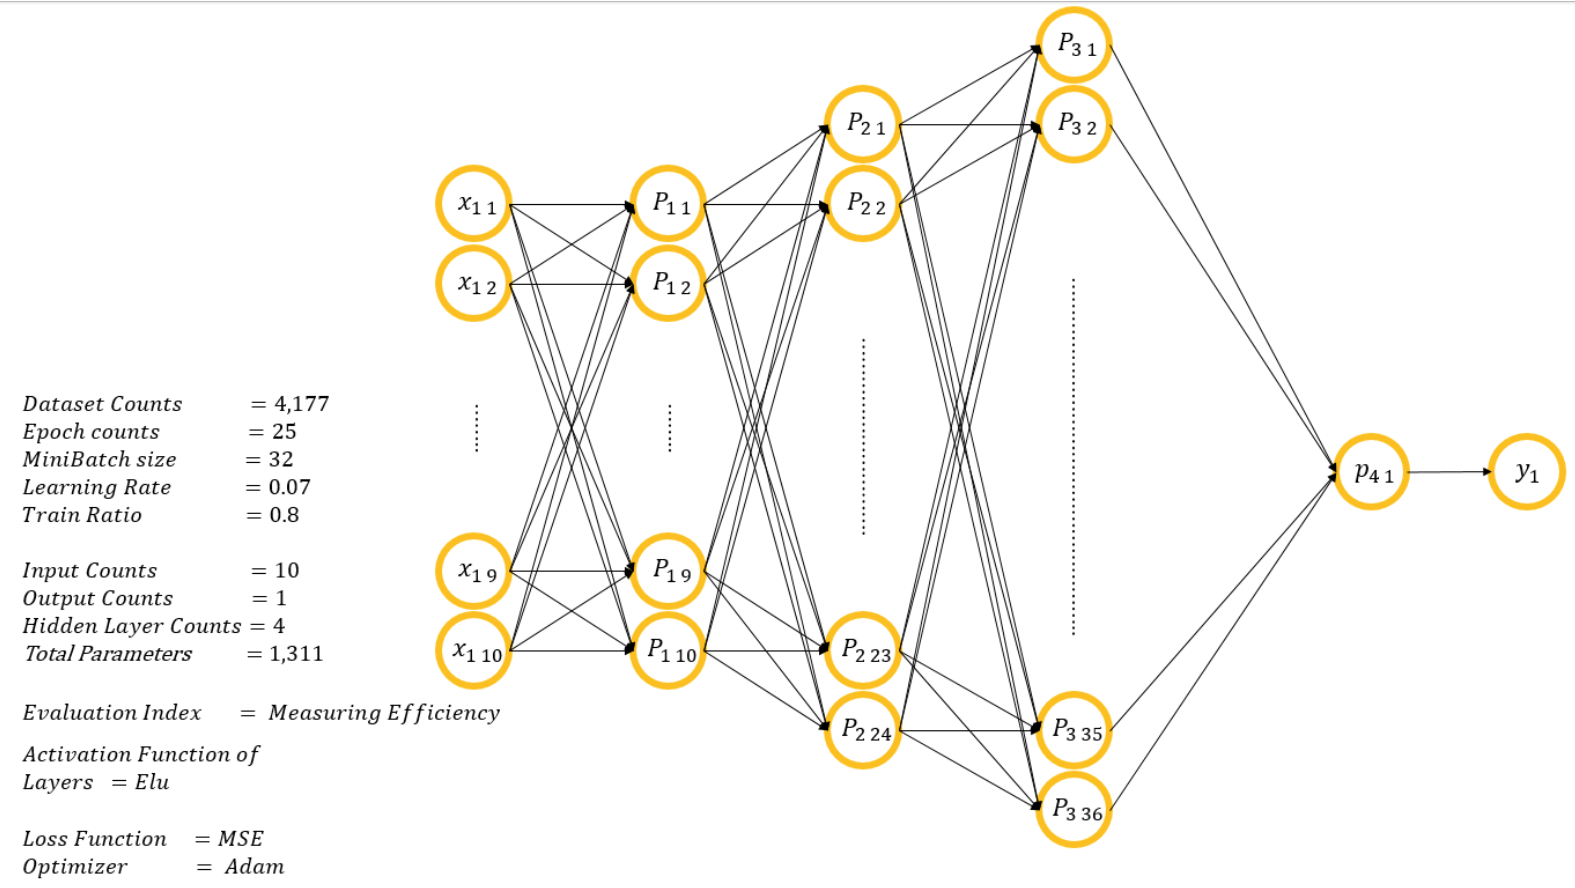

In [52]:
import tensorflow as tf

#신경망 이름을 지어줄거임.
GJ_NET_MODEL = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units = 10,
                                                          activation='elu',
                                                          input_shape = (10, )),
                                    tf.keras.layers.Dense(units=24,
                                                          activation='elu'),
                                    tf.keras.layers.Dense(units=36,
                                                          activation='elu'),
                                    tf.keras.layers.Dense(units=1)
                                    
])
#순차적으로 갈거다.([#인풋쉐입은 첫번째 계층만 간다!])
#단순 회귀이기 때문에 마지막에 활성화 함수를 딱히 써주지 않음 (softmax조차도)

#sigmoid -> 0~0.25 를 반환하고 점점더 0으로 수렴하느라 0.000000000000000000000이 되다보니

#기울기가 소멸 됨

#Relu 활성 함수가 생기게 됨.

In [53]:
GJ_NET_MODEL.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                264       
_________________________________________________________________
dense_11 (Dense)             (None, 36)                900       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [66]:
GJ_NET_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                     loss = 'mse')

#compile 어떻게 학습을 해줄지 설정해줄거임!

#loss가 mse인것은
#현재 우리가 분류가 아니라 회귀를 하는 것임
#회귀는 mse를 써준다.

#adam은 학습을 잘 시켜주는 학습 알고리즘, 도구

In [67]:
#학습을 실행시킬거임!

history_1 = GJ_NET_MODEL.fit(train_X, train_Y, epochs = 25, batch_size = 32,
                             validation_split = 0.2, 
                             callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
                                                                           monitor = 'val_loss')])




#검증데이터에 대한 비율을
#학습과 테스트 사이에 검증.

#회귀다보니까 값을 정확하게 맞추첬는지 어큐러시를 해줄 필요가 전혀 없음


#after수정!
#callback을 해주니까 벨로스가 높아지는 곳에서 여기까지만 돌리자! 하고 멈춰버리게됨. 조기중단의 힘
#여러 기능이 들어가 있는 함수중 하나인데, 조기 중단을 시켜주는 기법을 사용하는거임
#학습이 되면 될수록 결과가 더 안좋아질 수 있음.
#5개의 수치만큼 안좋아지면 끝낸다.

Epoch 1/25
84/84 [==============================] - 1s 3ms/step - loss: 8.6481 - val_loss: 5.3626
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 5.3068 - val_loss: 4.9543
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 5.2754 - val_loss: 6.9234
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: 6.4203 - val_loss: 5.9242
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 7.1843 - val_loss: 5.7717
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 6.4636 - val_loss: 5.6280
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 6.1070 - val_loss: 5.6622


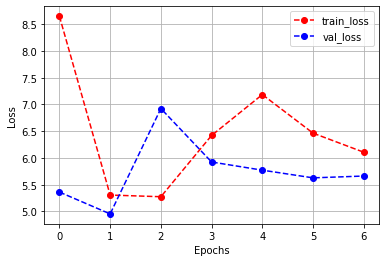

In [68]:
import matplotlib.pyplot as plt


plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '--o', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

#값이 하나가 튀었음.

In [69]:
GJ_NET_MODEL.evaluate(test_X, test_Y)

#평가해볼거임.

27/27 [==============================] - 0s 980us/step - loss: 6.0289


6.028902053833008

In [71]:
pred_Y = GJ_NET_MODEL.predict(test_X)

print(pred_Y[:10])

#모든 값이 똑같이 찍힌 것은, 학습이 잘 되지 않은 것
#많은 값이 있는데 하필 9.8이 찍힌 이유 : 데이터를 시각화해보면, rings라는
#종속변수에 9라는 숫자가 제일 많을 것임. 그러다보니 9를 예측하는게 가장 높은 정확도를 보일거임
#학습이 잘 되지 않은 경우, 제일 많이가는 수로 결과를 뱉는 경우가 있음.



[[ 8.046835 ]
 [12.280056 ]
 [10.846115 ]
 [ 7.8890243]
 [ 7.8890243]
 [ 7.8890243]
 [ 7.8890243]
 [17.666685 ]
 [ 7.8890243]
 [ 9.867531 ]]


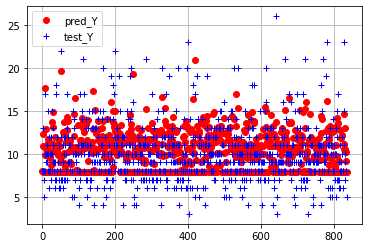

In [72]:
#시각화 결과까지 그려볼거임

plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.grid()
plt.legend()
plt.show()

#v파랑색이 실제 데이터이고
#빨간색이 예측 값으로서 정확하지 않았다.

#은닉계층 다 버리고 딱 하나의 계층으로만 만들어보자

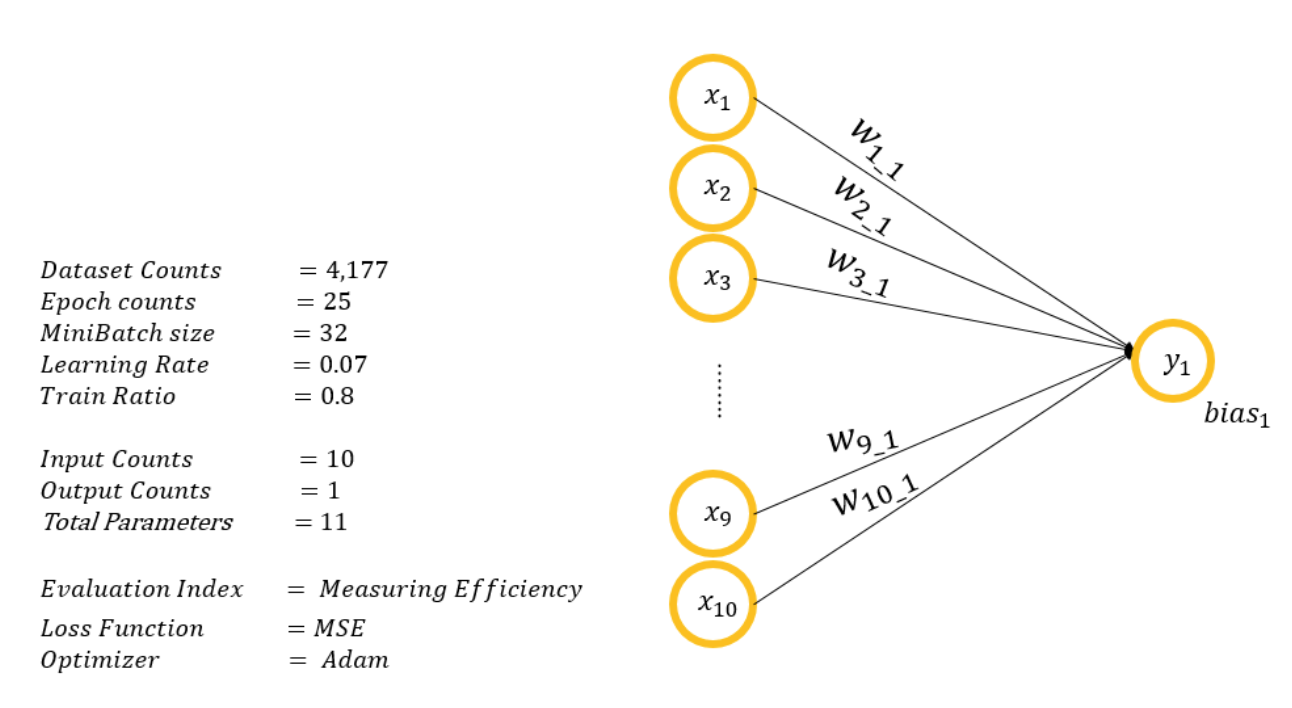

In [39]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,
                                                             input_shape = (10,))
])

In [40]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [41]:
GJ_NET_MODEL_V2.summary()

#파라미터가 11개인이유 10개의 파라미터와 y1 bias 1연결의 파라미터!

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [42]:
history2 = GJ_NET_MODEL_V2.fit(train_X, train_Y,
                               epochs = 25,batch_size = 32)

#초기 로스값은 조금 높게 나왔고, 중간에 튀는 값이 없음.

Epoch 1/25
105/105 [==============================] - 0s 841us/step - loss: 53.1535
Epoch 2/25
105/105 [==============================] - 0s 882us/step - loss: 10.2113
Epoch 3/25
105/105 [==============================] - 0s 835us/step - loss: 5.2102
Epoch 4/25
105/105 [==============================] - 0s 896us/step - loss: 4.9212
Epoch 5/25
105/105 [==============================] - 0s 906us/step - loss: 4.9164
Epoch 6/25
105/105 [==============================] - 0s 914us/step - loss: 4.9080
Epoch 7/25
105/105 [==============================] - 0s 987us/step - loss: 4.9295
Epoch 8/25
105/105 [==============================] - 0s 922us/step - loss: 4.9131
Epoch 9/25
105/105 [==============================] - 0s 960us/step - loss: 4.9485
Epoch 10/25
105/105 [==============================] - 0s 935us/step - loss: 4.9004
Epoch 11/25
105/105 [==============================] - 0s 959us/step - loss: 4.8816
Epoch 12/25
105/105 [==============================] - 0s 948us/step - loss: 4.8341

In [43]:
#평가 함 해보쟝

GJ_NET_MODEL_V2.evaluate(test_X,
                         test_Y)

27/27 [==============================] - 0s 947us/step - loss: 5.3877


5.387725830078125

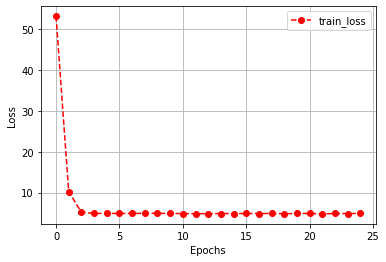

In [45]:
plt.plot(history2.history['loss'], '--o', color = 'red', label = 'train_loss')
#plt.plot(history2.history['val_loss'], '--o', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

#강사님이랑 달리 좀 바로 내려가는 늑김 ㅠㅠ
#내려가는게 중요하다고 하심.

In [46]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[ 9.186172 ]
 [12.093879 ]
 [ 8.632958 ]
 [ 7.298664 ]
 [ 6.626276 ]
 [ 7.333289 ]
 [ 9.017431 ]
 [17.655922 ]
 [ 6.1367397]
 [ 8.853769 ]]


In [47]:
print(test_Y[:10])

[[ 8.]
 [13.]
 [ 8.]
 [ 8.]
 [ 5.]
 [ 8.]
 [ 7.]
 [17.]
 [ 8.]
 [10.]]


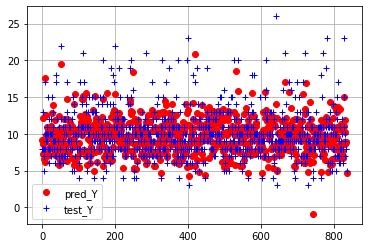

In [50]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')


plt.legend()
plt.grid()
plt.show()

#적절하게 분포하고 있는 것같음.


#위에 그림이랑 다른건, 파라미터레이어를 4개로 한거랑 1개로 진행한거의 차이인가?

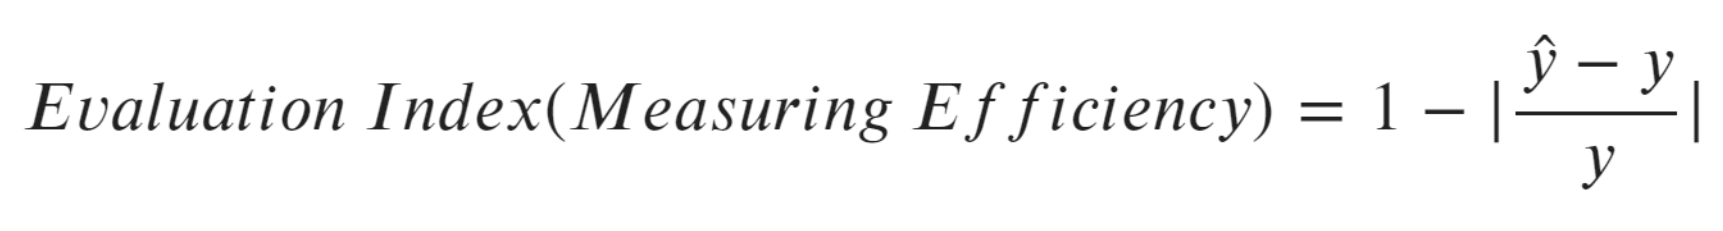

In [51]:
#위에 사진처럼 함번 해복게

acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))

#abs가 뭔가요.... 평균값을 구해준건 알겠습니다...
#절대값!!!!!!!!!!!!!!!!!!!을 구해주는 함수가 abs [-3] :3 [2]:2

print('GJ_NET_NODEL_V2 : ACC {} %'.format(np.round(acc*100,2)))

#어큐러시가 85정도를 보여주고 있음.

GJ_NET_NODEL_V2 : ACC 85.24 %


In [ ]:
###무조건 깊게 쌓는것, 무조건 정규화 하는것이 정답이 아닐 수 있음을 배움! ㅎㅎ 내가 가진 데이터가 어떠한 특징을 가지고, 어떠한 특성이 있는지 잘 알아내는 것도 중요!
